In [4]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }

## **Lab 3 - Prior and Posterior predictive distributions**

### **Modeling prior predictive distribution**

In [6]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/DA_Volume/AD2023_930/Lab_03/code_1.stan to exe file /home/DA_Volume/AD2023_930/Lab_03/code_1
INFO:cmdstanpy:compiled model executable: /home/DA_Volume/AD2023_930/Lab_03/code_1


In [7]:
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [8]:
dataframe = samples.draws_pd()
dataframe

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,17.0,0.242309
1,0.0,0.0,50.0,5.0,0.197078
2,0.0,0.0,50.0,12.0,0.229830
3,0.0,0.0,50.0,11.0,0.213273
4,0.0,0.0,50.0,8.0,0.201128
...,...,...,...,...,...
995,0.0,0.0,50.0,14.0,0.256028
996,0.0,0.0,50.0,16.0,0.208305
997,0.0,0.0,50.0,13.0,0.211235
998,0.0,0.0,50.0,14.0,0.209218


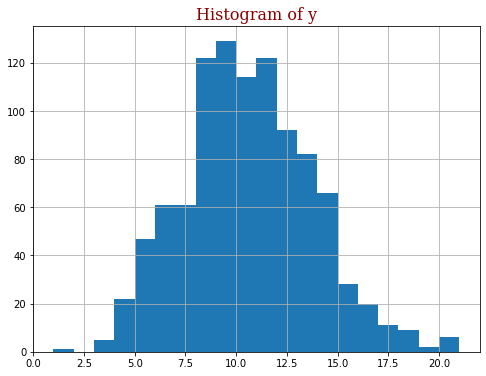

In [9]:
y = dataframe['y']
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20)
plt.title("Histogram of y", fontdict=font)
plt.grid()
plt.show()

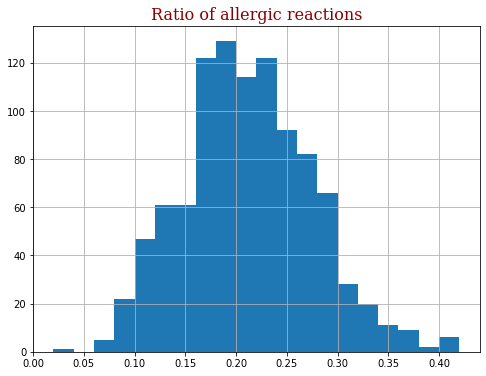

In [10]:
ratio = y / 50 # Ratio of allergic reactions for each sample
plt.figure(figsize=(8, 6))
plt.hist(ratio, bins=20)
plt.title("Ratio of allergic reactions", fontdict=font)
plt.grid()
plt.show()

In [11]:
mean = ratio.mean()
print("Mean of ratio: ", mean)

Mean of ratio:  0.20192000000000002


#### **The mean of the coefficient**
The mean of the coefficient is consistent with prior knowledge - approximation equal to 0.2.<br>

### **Modeling posterior and posterior predictive distribution**

In [12]:
gen_quant = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /home/DA_Volume/AD2023_930/Lab_03/code_2.stan to exe file /home/DA_Volume/AD2023_930/Lab_03/code_2
INFO:cmdstanpy:compiled model executable: /home/DA_Volume/AD2023_930/Lab_03/code_2


In [13]:
samples = gen_quant.sample(data={'N':50, 'y':7}) # Generated default number of samples

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:01 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [14]:
dataframe = samples.draws_pd()
dataframe

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-25.2270,0.995207,0.942662,1.0,1.0,0.0,25.5408,0.129379,7.0
1,-24.9512,1.000000,0.942662,1.0,1.0,0.0,25.4156,0.132542,5.0
2,-25.5368,0.948765,0.942662,1.0,1.0,0.0,25.6628,0.126030,7.0
3,-24.8585,1.000000,0.942662,1.0,1.0,0.0,25.5731,0.133651,3.0
4,-23.7912,1.000000,0.942662,1.0,1.0,0.0,24.7331,0.148717,9.0
...,...,...,...,...,...,...,...,...,...
3995,-23.0041,0.923501,0.968456,1.0,1.0,0.0,23.0061,0.212980,6.0
3996,-22.6168,1.000000,0.968456,1.0,3.0,0.0,22.9552,0.191633,10.0
3997,-24.7777,0.597922,0.968456,1.0,3.0,0.0,26.1726,0.134635,6.0
3998,-23.7310,1.000000,0.968456,1.0,1.0,0.0,24.6447,0.149750,6.0


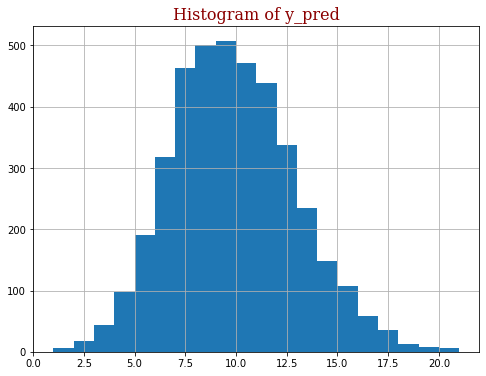

In [15]:
y_pred = dataframe['y_pred']
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20)
plt.title("Histogram of y_pred", fontdict=font)
plt.grid()
plt.show()

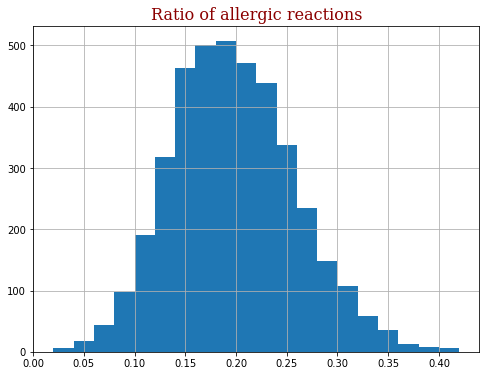

In [16]:
ratio = y_pred / 50 # Ratio of allergic reactions for each sample
plt.figure(figsize=(8, 6))
plt.hist(ratio, bins=20)
plt.title("Ratio of allergic reactions", fontdict=font)
plt.grid()
plt.show()

#### Compute the expected value and 94% density interval of the predicted ratio, <br> compare it with expected value and 94% density interval of parameter p. Use arviz package.

In [17]:
y_pred_ratio = ratio.mean()
y_pred_density = az.hdi(ratio.to_numpy(), 0.94)

p = dataframe['p']
p_ratio = p.mean()
p_ratio_density = az.hdi(p.to_numpy(), 0.94)

print(f"Expected ratio value equals: {y_pred_ratio:.3f} and 94% density interval of the predicted ratio equals: {y_pred_density}")
print(f"Expected parameter value equals: {p_ratio:.3f} and 94% density interval of the parameter p equals: {p_ratio_density}")

Expected ratio value equals: 0.188 and 94% density interval of the predicted ratio equals: [0.08 0.3 ]
Expected parameter value equals: 0.187 and 94% density interval of the parameter p equals: [0.135723 0.237225]


#### Compute the probability that ratio is lower than the average probability.

In [18]:
avg_probability = 0.2
prob_ratio_lower = np.mean(ratio < avg_probability)
print(f"Probability that ratio is lower than the average probability equals: {prob_ratio_lower}")

Probability that ratio is lower than the average probability equals: 0.536
